## Python imports

In [1]:
import scipy as sp
# from scipy.integrate import odeint
import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

## Define rate vector

$$
\mathbf{r}\left(\mathbf{C}\right)=\begin{bmatrix}r_{\mathrm{A}}\\
r_{\mathrm{B}}
\end{bmatrix}
$$

where

$$ \begin{align}
r_{\mathrm{A}}	&=-k_{1}c_{\mathrm{A}}-2k_{3}c_{\mathrm{A}}^{2} \\
r_{\mathrm{B}}	&=k_{1}c_{\mathrm{A}}-k_{2}c_{\mathrm{B}}
\end{align}
$$

In [2]:
def rate_fn(c, t):
    # Functions that are to be integrated with SciPy's odeint() function
    # require both the state vector C and integration parameter t to be
    # specified as parameters, even though we do not use t in rate expressions.
    
    cA = c[0]
    cB = c[1]
    
    # rate constants
    k1 = 1.0
    k2 = 1.0
    k3 = 10.0
    
    # component rate expressions
    rA = -k1*cA - 2*k3*(cA**2)
    rB = k1*cA - k2*cB
    
    return sp.array([rA, rB])

## Specify feed point

$$
\mathbf{C_{f}}=\begin{bmatrix}c_{\mathrm{A}}\\
c_{\mathrm{B}}
\end{bmatrix}=\begin{bmatrix}1.0\\
0.0
\end{bmatrix}\ \textrm{mol/L}
$$

In [3]:
Cf = sp.array([1.0, 0.0])

## Solve CSTR

To generate a CSTR locus, we solve the system of nonlinear equations representing the CSTR for different values of residence time and a fixed feed.

In [4]:
# CSTR residence times to solve for
t_end = 500.0
npts = 50
cstr_ts = sp.logspace(-4, sp.log10(t_end), npts)
cstr_cs = []

# needed for nonlinear solver
C_guess = Cf

for ti in cstr_ts:
    
    # define the function F = Cf + ti*r(C) - C
    def cstr_fn(C):
        r = rate_fn(C, 0)
        F = Cf + ti*r - C

        return F
    
    # solve for F = 0
    ci = scipy.optimize.newton_krylov(cstr_fn, C_guess)
    
    # update initial guess based on previous solution
    C_guess = ci
    
    cstr_cs.append(ci)
    
# convert cstr_cs list into a numpy array for convenience
cstr_cs = sp.array(cstr_cs)

## Plot CSTR locus in $c_{A}$-$c_{B}$ space

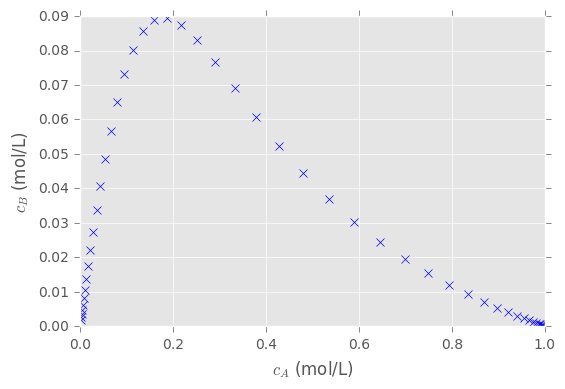

In [5]:
fig = plt.figure()
ax = fig.gca()

ax.plot(cstr_cs[:, 0], cstr_cs[:, 1], "bx")

ax.set_xlabel("$c_A$ (mol/L)")
ax.set_ylabel("$c_B$ (mol/L)")

plt.show(fig)